In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
print(torch.__version__)  

# Data from House Prices: Advanced Regression Techniques
# Cleaned Data
X_train_pd = pd.read_csv('X_train_HP.csv')
y_train_pd = pd.read_csv('y_train_HP.csv')
X_cv_pd = pd.read_csv('X_cv_HP.csv')
y_cv_pd = pd.read_csv('y_cv_HP.csv')
test_pd = pd.read_csv('test_skew_HP.csv')

# Convert to tensor and check Datatype

X_t = torch.from_numpy(X_train_pd.values)
y_t = torch.from_numpy(y_train_pd.values)
X_cv = torch.from_numpy(X_cv_pd.values)
y_cv = torch.from_numpy(y_cv_pd.values)
test = torch.from_numpy(test_pd.values)

X_t.type()

2.1.0a0+gitd9f822b


'torch.DoubleTensor'

# Neural Network
*(Linear Regression with PyTorch)*

MSELoss|  path: torch/nn/modules/loss.py
F.mseloss|  path: torch/nn/modules/loss.py
loss:  tensor(144.2726, grad_fn=<MseLossBackward0>)
MSELoss|  path: torch/nn/modules/loss.py
F.mseloss|  path: torch/nn/modules/loss.py
loss:  tensor(156.8879, grad_fn=<MseLossBackward0>)
MSELoss|  path: torch/nn/modules/loss.py
F.mseloss|  path: torch/nn/modules/loss.py
loss:  tensor(155.0011, grad_fn=<MseLossBackward0>)
MSELoss|  path: torch/nn/modules/loss.py
F.mseloss|  path: torch/nn/modules/loss.py
loss:  tensor(135.8104, grad_fn=<MseLossBackward0>)
MSELoss|  path: torch/nn/modules/loss.py
F.mseloss|  path: torch/nn/modules/loss.py
loss:  tensor(145.4581, grad_fn=<MseLossBackward0>)
MSELoss|  path: torch/nn/modules/loss.py
F.mseloss|  path: torch/nn/modules/loss.py
loss:  tensor(142.3873, grad_fn=<MseLossBackward0>)
MSELoss|  path: torch/nn/modules/loss.py
F.mseloss|  path: torch/nn/modules/loss.py
loss:  tensor(137.6055, grad_fn=<MseLossBackward0>)
MSELoss|  path: torch/nn/modules/loss.py
F.mselo

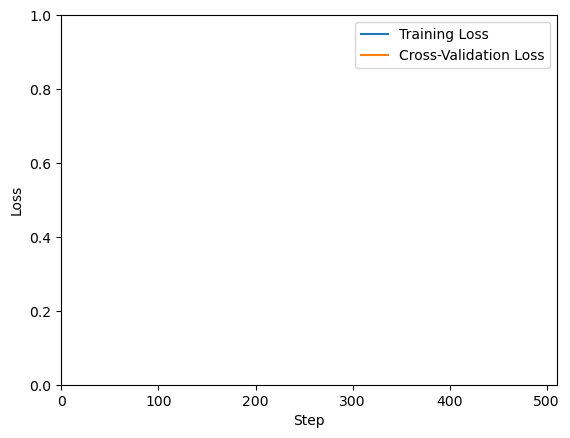

In [7]:
def Abstract_2(X, y, X_cv, y_cv, test, batch_size, epochs, lr):
    # Model
    model = nn.Sequential(
        # Input Layer
        nn.Linear(X.shape[1], 32),
        nn.ReLU(),
        # Hidden Layers
        nn.Linear(32, 32),
        nn.ReLU(),
        nn.Linear(32, 16),
        nn.ReLU(),
        # Output Layer
        nn.Linear(16, 1),
    )
    # Loss and Optimizer with L2 Regularization
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=0.004)

    # Create DataLoader for training data
    train_data = TensorDataset(torch.Tensor(X).float(), torch.Tensor(y).float())
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

    # Create DataLoader for cross validation data
    cv_data = TensorDataset(torch.Tensor(X_cv).float(), torch.Tensor(y_cv).float())
    cv_loader = DataLoader(cv_data, batch_size=batch_size, shuffle=False)

    # Train the Model
    train_loss = []
    cv_loss = []
    for epoch in range(epochs):
        for i, (inputs, labels) in enumerate(train_loader):
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            print('loss: ', loss)
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Store the loss values
            train_loss.append(loss.item())

        # Compute CV Loss
        with torch.no_grad():
            for inputs_cv, labels_cv in cv_loader:
                outputs_cv = model(inputs_cv)
                loss_cv = criterion(outputs_cv, labels_cv)
                cv_loss.append(loss_cv.item())

        # Print Loss and CV Loss every 10 epochs
        if (epoch+1) % 10 == 0:
            print ('Epoch [%d/%d], Train Loss: %.4f, CV Loss: %.4f' 
                   %(epoch+1, epochs, train_loss[-1], cv_loss[-1]))

    # Plot the loss curve
    plt.plot(train_loss, label='Training Loss')
    plt.plot(cv_loss, label='Cross-Validation Loss')
    plt.legend()
    plt.xlim(0, epochs*len(train_loader))
    plt.ylim(0, 1)
    plt.xlabel('Step')
    plt.ylabel('Loss')
    plt.show()

    # Save the Model
    torch.save(model.state_dict(), 'model_ab3.pkl')


Abstract_2(X_t, y_t, X_cv, y_cv, test, 2, 1, 0.00001)


L1Loss|  path: torch/nn/modules/loss.py
F.l1_loss|  path: torch/nn/modules/loss.py
L1Loss|  path: torch/nn/modules/loss.py
F.l1_loss|  path: torch/nn/modules/loss.py


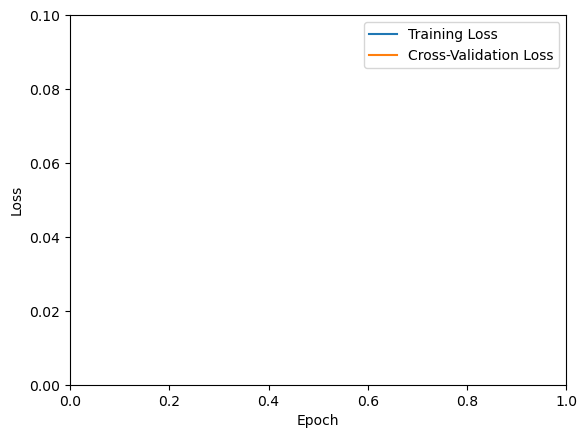

In [3]:
def Abstract_1(X, y, X_cv, y_cv, test, epochs, lr):
    # Model
    model = nn.Sequential(
        # Input Layer
        nn.Linear(X.shape[1], 32),
        nn.ReLU(),
        # Hidden Layers
        nn.Linear(32, 32),
        nn.ReLU(),
        nn.Linear(32, 16),
        nn.ReLU(),
        # Output Layer
        nn.Linear(16, 1),
    )
    # Loss and Optimizer with L2 Regularization
    criterion = nn.L1Loss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=0.004)

    # Train the Model
    train_loss = []
    cv_loss = []
    for epoch in range(epochs):

        # Forward pass
        outputs = model(X.float())
        outputs_cv = model(X_cv.float())
        loss = criterion(outputs, y.float())
        loss_cv = criterion(outputs_cv, y_cv.float())

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Store the loss values
        train_loss.append(loss.item())
        cv_loss.append(loss_cv.item())

        # Print Loss and CV Loss
        if (epoch+1) % 100 == 0:
            print ('Epoch [%d/%d], Train Loss: %.4f, CV Loss: %.4f' 
                   %(epoch+1, epochs, loss.item(), loss_cv.item()))

    # Plot the loss curve
    plt.plot(train_loss, label='Training Loss')
    plt.plot(cv_loss, label='Cross-Validation Loss')
    plt.legend()
    plt.xlim(0, epochs)
    plt.ylim(0, 0.1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

    # Save the Model
    torch.save(model.state_dict(), 'model_ab3.pkl')

# Call the function
Abstract_1(X_t, y_t, X_cv, y_cv, test, 1, 0.00001)


In [9]:
print(pred_ab1)

NameError: name 'pred_ab1' is not defined

In [ ]:
# convert from 1logp format to normal p format
pred_ab1 = np.exp(pred_ab1.detach().numpy()) - 1
print(pred_ab1)

: 

In [ ]:
#Create csv file for submission
sub_df = pd.read_csv('sample_submission.csv', index_col = "Id")
sub_df["SalePrice"] = pred_ab1
sub_df.to_csv('submission_ab1_5.csv')


: 

: 